In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from pathlib import Path

np.random.seed(42)

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

pd.set_option('display.max_columns', None)

In [2]:
datapath = Path() / "data" / "lifesat"

oced_bli = pd.read_csv(datapath / "oecd_bli.csv")
gdp_er_capita = pd.read_csv(datapath / "gdp_per_capita.csv")

In [3]:
gdp_er_capita_2020=gdp_er_capita[gdp_er_capita['Year']==2020]
gdp_er_capita_2020=gdp_er_capita_2020.rename(columns={"GDP per capita, PPP (constant 2017 international $)": "GDP per capita (USD)"})
gdp_er_capita_2020

,Entity,Code,Year,GDP per capita (USD)
18,Afghanistan,AFG,2020,1978.961579
49,Africa Eastern and Southern,NaN,2020,3387.594670
80,Africa Western and Central,NaN,2020,4003.158913
111,Albania,ALB,2020,13295.410885
142,Algeria,DZA,2020,10681.679297
...,...,...,...,...
6984,Vanuatu,VUT,2020,2762.791388
7015,Vietnam,VNM,2020,8200.331867
7046,World,OWID_WRL,2020,16194.040310
7077,Zambia,ZMB,2020,3270.035112


In [4]:
oced_bli["Indicator"].value_counts()
oced_bli = oced_bli[oced_bli["INEQUALITY"]=="TOT"]
oced_bli = oced_bli.pivot(
    index = "Country",
    columns = "Indicator",
    values = "Value"
)
oced_bli=oced_bli.reset_index()

In [5]:
gdp_er_capita_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224 entries, 18 to 7108
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                224 non-null    object 
 1   Code                  179 non-null    object 
 2   Year                  224 non-null    int64  
 3   GDP per capita (USD)  224 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 8.8+ KB


In [6]:
full_country_stats = oced_bli.merge(
    gdp_er_capita_2020,
    left_on = "Country",
    right_on = "Entity",
    how = "inner"
)

In [7]:
full_country_stats = full_country_stats[["Country", "Life satisfaction", "GDP per capita (USD)"]]
full_country_stats = full_country_stats.sort_values(by = "GDP per capita (USD)")

In [8]:
full_country_stats.to_csv(datapath / "lifesat_full.csv", index=False)

In [9]:
min_gdp = 23_500
max_gdp = 62_500

country_stats = full_country_stats[
    (full_country_stats["GDP per capita (USD)"] >= min_gdp)
    & (full_country_stats["GDP per capita (USD)"] <= max_gdp)
]
country_stats.to_csv(datapath / "lifesat.cvs", index=False)

In [10]:
lifesat = pd.read_csv("data/lifesat/lifesat.cvs")

lifesat.rename(columns={"Life satisfaction": "Satysfakcja życia"}, inplace=True)
lifesat.rename(columns={"GDP per capita (USD)": "PKB na mieszkańca (USD)"}, inplace=True)
lifesat[:50]

,Country,Satysfakcja życia,PKB na mieszkańca (USD)
0,Russia,5.8,26456.387938
1,Greece,5.4,27287.083401
2,Turkey,5.5,28384.987785
3,Latvia,5.9,29932.493910
4,Hungary,5.6,31007.768407
5,Portugal,5.4,32181.154537
6,Poland,6.1,32238.157259
7,Estonia,5.7,35638.421351
8,Spain,6.3,36215.447591
9,Slovenia,5.9,36547.738956


<Axes: xlabel='PKB na mieszkańca (USD)', ylabel='Satysfakcja życia'>

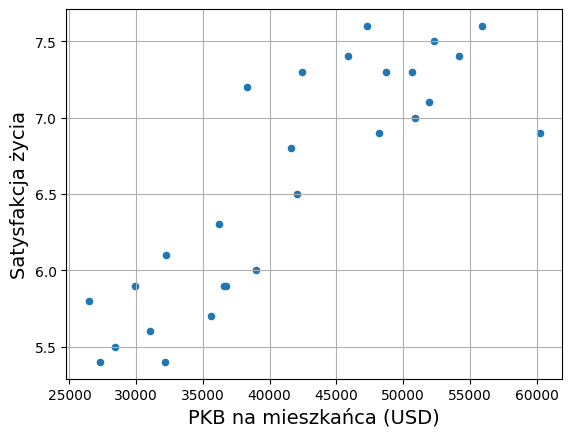

In [11]:
lifesat.plot(kind="scatter", grid=True, x="PKB na mieszkańca (USD)", y="Satysfakcja życia")

In [12]:
X = lifesat[["PKB na mieszkańca (USD)"]]
y = lifesat[["Satysfakcja życia"]]

model = LinearRegression()
model.fit(X,y)
theta_0 = model.intercept_[0]
theta_1 = model.coef_[0][0] 
print(f"theta_0 = {theta_0}, theta_1 = {theta_1}")
summary = model.score(X,y)
print(f"R^2 = {summary}")

theta_0 = 3.7490494273769093, theta_1 = 6.778899694341222e-05
R^2 = 0.7272610933272652


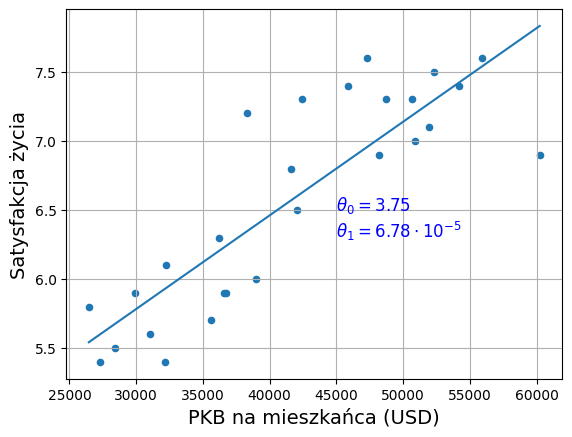

In [13]:
lifesat.plot(kind="scatter", grid=True, x="PKB na mieszkańca (USD)", y="Satysfakcja życia")
plt.plot(X, theta_0 + theta_1 * X)
plt.text(45000, 6.5 , fr"$\theta_0 = {theta_0.round(2)}$", color = "blue")
plt.text(45000, 6.3 , fr"$\theta_1 = {theta_1 * 1e5:.2f} \cdot 10^{{-5}}$", color = "blue")
plt.show()

In [14]:
cyprus_gdp_per_capita = gdp_er_capita_2020[gdp_er_capita_2020["Entity"] == "Cyprus"]["GDP per capita (USD)"].values[0]
cyprus_gdp_per_capita

37655.1803457421

In [15]:
cyprus_predicted_life_satisfaction = model.predict([[cyprus_gdp_per_capita]])[0][0]
cyprus_predicted_life_satisfaction

c:\Users\Maciek\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


6.301656332738056

In [22]:
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors=3)  
model_knn.fit(X, y)
model_knn.predict([[cyprus_gdp_per_capita]])[0,0]

c:\Users\Maciek\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


6.333333333333333